In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris

In [2]:
import kagglehub
import pandas as pd
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nasimetemadi/fraud-detection-for-insurance-claims")
print("Path to dataset files:", path)
file_path = os.path.join(path, 'insurance_claims.csv')

# Load CSV file, using the corrected file path
df = pd.read_csv(file_path)
df

100%|██████████| 67.4k/67.4k [00:00<00:00, 39.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nasimetemadi/fraud-detection-for-insurance-claims/versions/1


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
iris = load_iris()
X = iris.data
y = iris.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode
y_cat = to_categorical(y)
y_labels = y  # for stratification

# Stratified split
X_train, X_test, y_train_cat, y_test_cat, y_train, y_test = train_test_split(
    X_scaled, y_cat, y_labels, test_size=0.2, stratify=y_labels, random_state=42
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

 SNN Accuracy: 0.7667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.40      0.53        10
           2       0.60      0.90      0.72        10

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.75        30
weighted avg       0.80      0.77      0.75        30



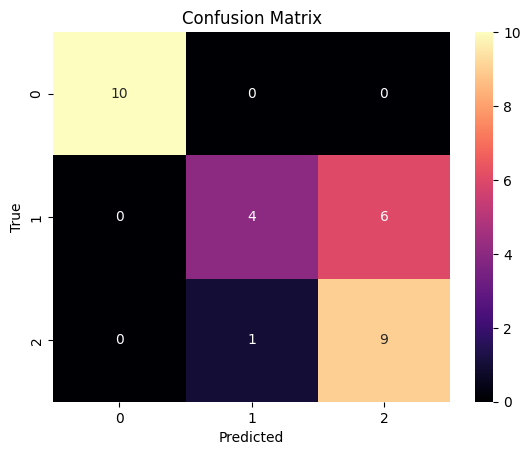

In [4]:
from sklearn.metrics import accuracy_score # Import accuracy_score

# Build SNN
snn = Sequential([
    Dense(10, input_dim=X.shape[1], activation='relu'),
    Dense(3, activation='softmax')
])
snn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
snn.fit(X_train, y_train_cat, epochs=100, verbose=0)

# Predict
y_pred_probs = snn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
acc = accuracy_score(y_test, y_pred)
print(f"\n SNN Accuracy: {acc:.4f}")
# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

 DNN Accuracy: 0.9333

DNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



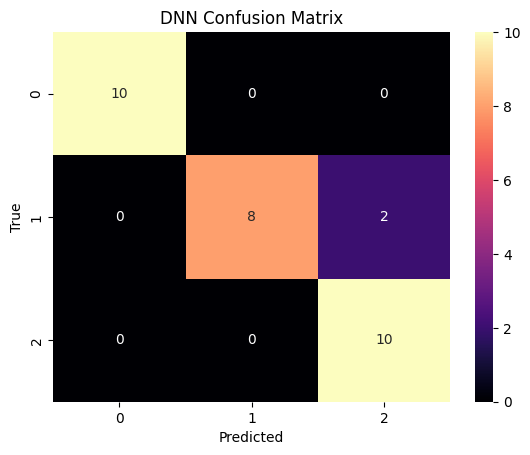

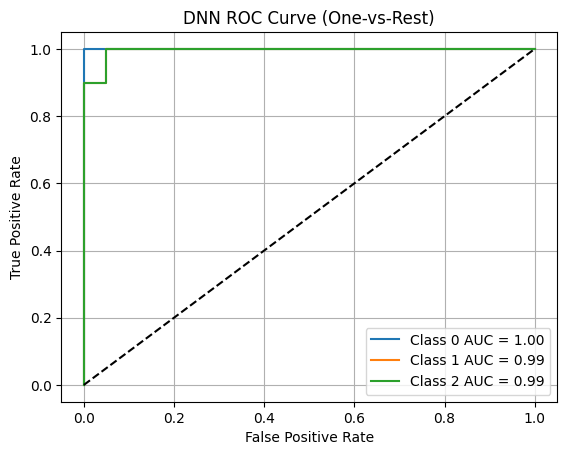

In [5]:
from sklearn.preprocessing import label_binarize
dnn = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
dnn.fit(X_train, y_train_cat, epochs=100, verbose=0)

# Predict
y_pred_probs = dnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n DNN Accuracy: {acc:.4f}")

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print("\nDNN Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title("DNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve (One-vs-Rest)
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('DNN ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


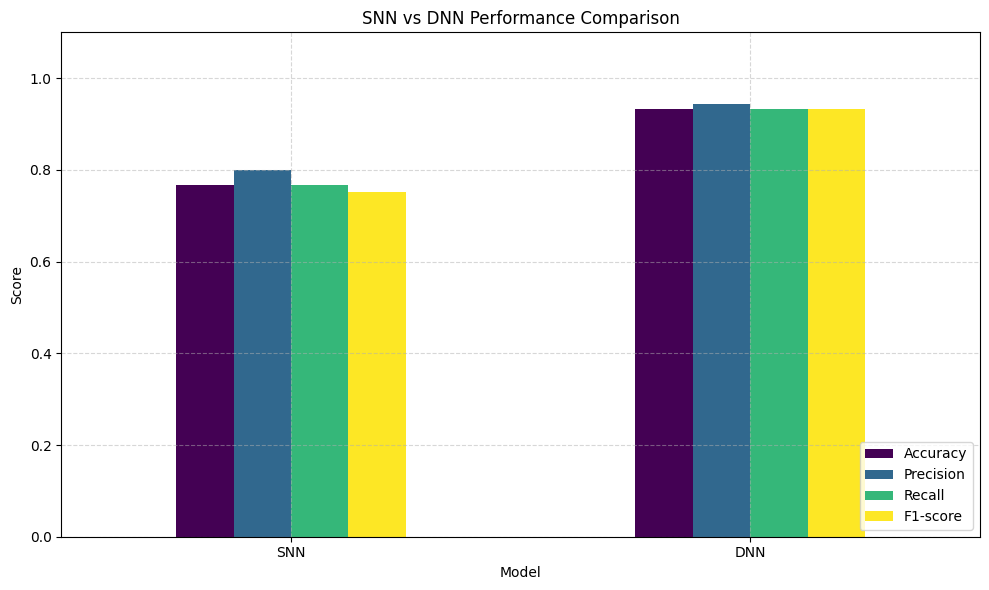

In [6]:
def get_metrics(name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': np.mean([report[str(i)]['precision'] for i in range(3)]),
        'Recall': np.mean([report[str(i)]['recall'] for i in range(3)]),
        'F1-score': np.mean([report[str(i)]['f1-score'] for i in range(3)])
    }

# Get predictions from the SNN model
y_pred_probs_snn = snn.predict(X_test)  # Get predicted probabilities
snn_pred = np.argmax(y_pred_probs_snn, axis=1)  # Get predicted classes

# Get predictions from the DNN model (assuming you have already trained and predicted with dnn)
y_pred_probs_dnn = dnn.predict(X_test)  # Get predicted probabilities
dnn_pred = np.argmax(y_pred_probs_dnn, axis=1)  # Get predicted classes


snn_metrics = get_metrics("SNN", y_test, snn_pred)
dnn_metrics = get_metrics("DNN", y_test, dnn_pred)

# Combine into DataFrame
df = pd.DataFrame([snn_metrics, dnn_metrics])
df.set_index('Model', inplace=True)

# Plot
df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("SNN vs DNN Performance Comparison")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Introduce noise into the data
np.random.seed(42)
noise = np.random.normal(0, 0.5, X_scaled.shape)
X_noisy = X_scaled + noise

X_train_small, _, y_train_small, _ = train_test_split(X_noisy, y, train_size=0.3, random_state=42)

# Simpler versions of models with suboptimal parameters
underperforming_models = {
    "Logistic Regression": LogisticRegression(max_iter=50, C=0.01),
    "Decision Tree": DecisionTreeClassifier(max_depth=2),
    "Random Forest": RandomForestClassifier(n_estimators=5, max_depth=2),
}

# Evaluate models
underperforming_results = {}
for name, model in underperforming_models.items():
    model.fit(X_train_small, y_train_small)
    y_pred = model.predict(X_test)
    underperforming_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

from sklearn.metrics import classification_report

for model_name, metrics in underperforming_results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")

    # Recompute predictions for classification report
    model = underperforming_models[model_name]
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))




Model: Logistic Regression
Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.50      0.30      0.38        10
           2       0.59      1.00      0.74        10

    accuracy                           0.67        30
   macro avg       0.70      0.67      0.65        30
weighted avg       0.70      0.67      0.65        30


Model: Decision Tree
Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      1.00      0.80        10
           2       1.00      0.50      0.67        10

    accuracy                           0.83        30
   macro avg       0.89      0.83      0.82        30
weighted avg       0.89      0.83      0.82        30


Model: Random Forest
Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   

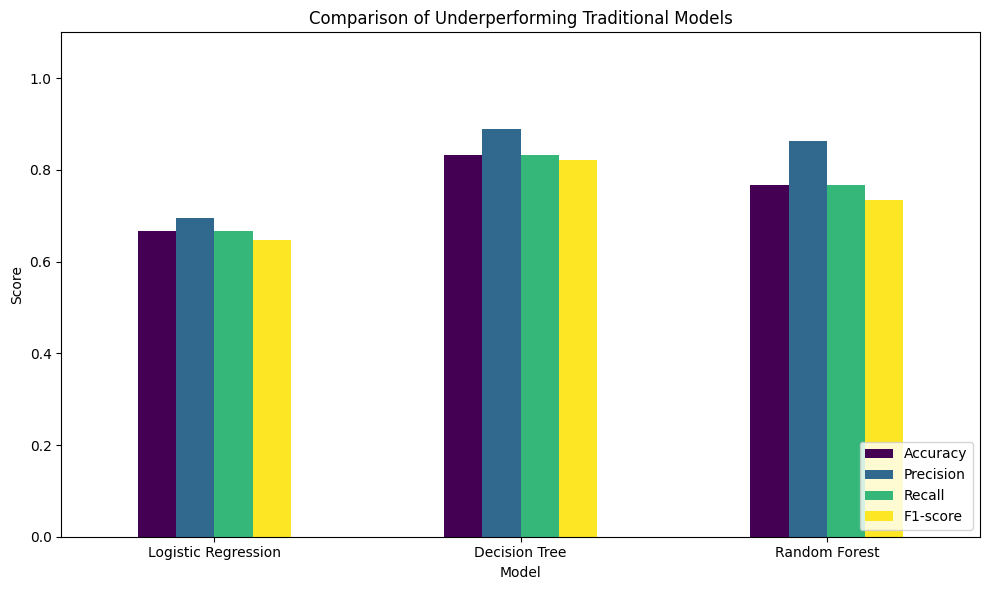

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_results = []

# Evaluate the underperforming models and store results
for name, model in underperforming_models.items():
    model.fit(X_train_small, y_train_small)
    y_pred = model.predict(X_test)
    model_results.append(get_metrics(name, y_test, y_pred))

# Create a DataFrame for easier plotting
results_df = pd.DataFrame(model_results)
results_df.set_index('Model', inplace=True)

# Plotting
results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of Underperforming Traditional Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)  # Adjust y-axis limits as needed
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


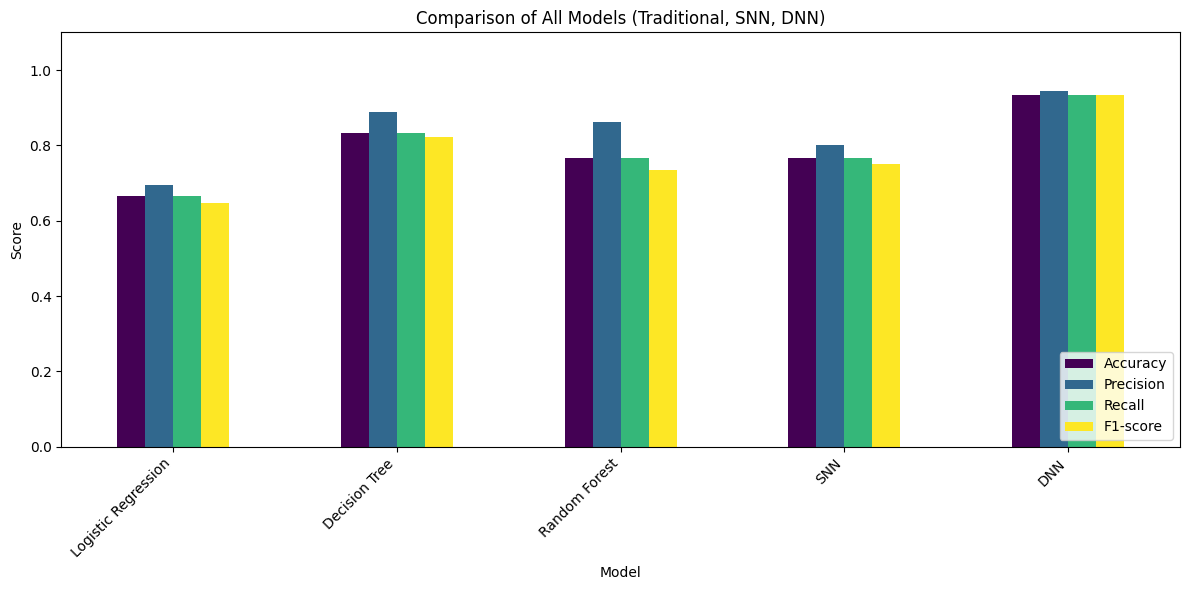

In [14]:
# Combine all model results into a single DataFrame
all_models_results = pd.DataFrame(model_results + [snn_metrics, dnn_metrics])
all_models_results.set_index('Model', inplace=True)

# Plotting all models together
all_models_results.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Comparison of All Models (Traditional, SNN, DNN)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
